## Домашняя работа #3.

Отправлять ссылку через форму нужно только один раз. Исправления вносятся в тот же ноутбук до хард-дедлайна и помечаются комментариями в коде и комментариями к соотвествующим ячейкам.

Материалы к домашке доступны по ссылке:
https://drive.google.com/drive/folders/1dNoAOMcrRyuf_3vS1LTPpdyrqYxgvPOy?usp=sharing



Большая домашка с увеличенным баллом и временем до дедлайна.
* Морфлогия.
* Фильтры габора.
* Цветовые гистрограммы.
* Гистограммы градиентов.

МОАД5 (ИТМО6)

**Soft deadline: 12.04.2023 (05.04.2023) 03:00:00 +0003 GMT**

**Hard deadline: 19.04.2023 (12.04.2023) 03:00:00 +0003 GMT**

In [1]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/Image_analysis/МатериалыДЗ3")

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=kwargs.get('size', (10, 5)))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img, size=(10, 5)):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img, size=(10, 5)):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()



# МОРФОЛОГИЯ

**1. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно бытьn изображение, в котором удален весь текст и оставлены только границы таблицы.

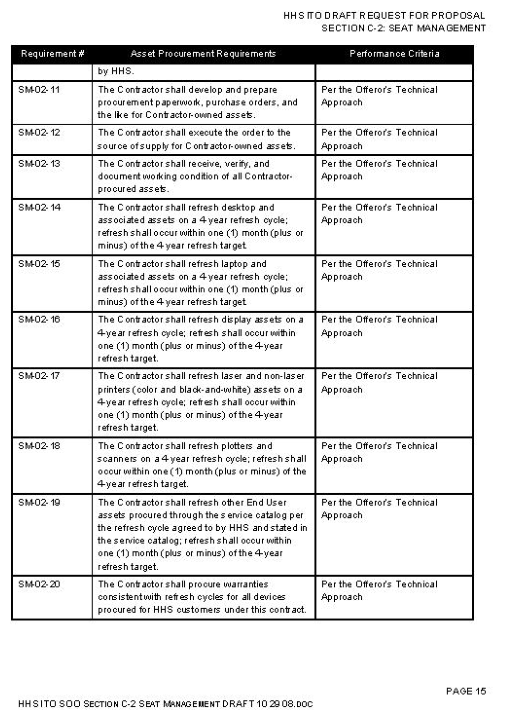

In [4]:
table = cv2.imread(str(sources_path / "table.jpg"), 0)
show_gray(table, size=(5, 10))

In [5]:
bw = cv2.adaptiveThreshold(table, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 1)
bw = cv2.bitwise_not(bw)
# находим горизонтальные линии
horStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))
horizontal = cv2.erode(bw, horStructure)
horizontal = cv2.dilate(horizontal, horStructure)
horizontal = cv2.dilate(horizontal, (1,1), iterations=5)
horizontal = cv2.erode(horizontal, (1,1), iterations=5)
# находим вертикальные линии
verStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 15))
vertical = cv2.erode(bw, verStructure)
vertical = cv2.dilate(vertical, verStructure)
vertical = cv2.dilate(vertical, (1,1), iterations=5)
vertical = cv2.erode(vertical, (1,1), iterations=5)

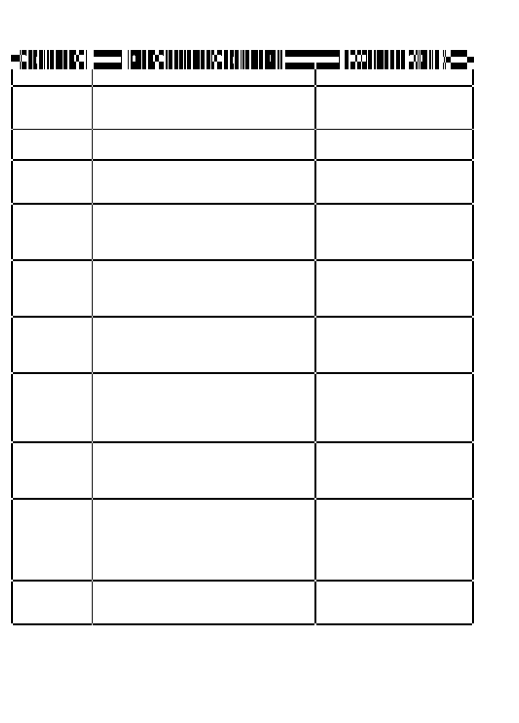

In [6]:
# объединяем горизонтальные и вертикальные линии
combined = horizontal + vertical
combined_final = np.copy(combined)
combined_final[combined == 0] = 255
combined_final[combined == 255] = 0
show_gray(combined_final, size=(5, 10))

**2. (5 баллов)** Для изображения $circles.jpg$ реализуйте морфологический алгоритм для построения трех изображений, которые бы содержали соответственно:

* только частицы, касающиеся краев изображения,

* только группы перекрывающихся частиц,

* только одиночные круглые частицы.

Посчитайте число частиц и групп на каждом изображении. Раскрастье отдельные компоненты с помощью функции.

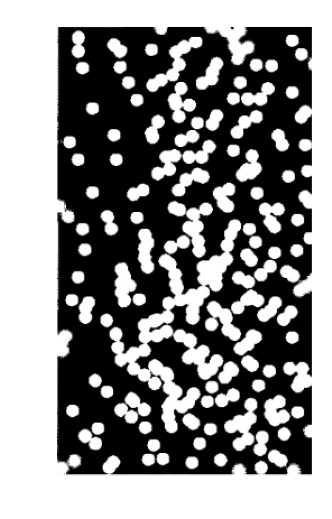

In [7]:
circles = cv2.imread(str(sources_path / "circles.png"), 0)
show_gray(circles)

Количество: 18


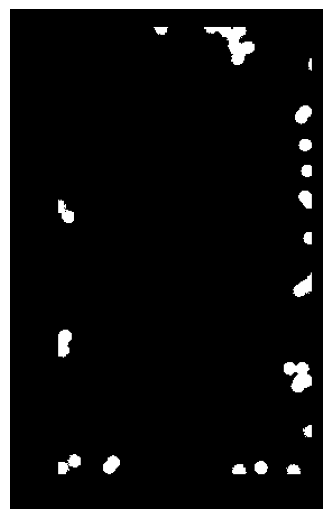

In [8]:
# Только частицы, касающиеся краев изображения
ret_1, thresh_1 = cv2.threshold(circles, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels_1, labels_1, stats_1, centroids_1 = cv2.connectedComponentsWithStats(thresh_1, 8)
final_circles_1 = np.zeros(circles.shape)

for i in range(labels_1.shape[0]):
    for j in range(labels_1.shape[1]):
        if labels_1[i, j] == 1:
            final_circles_1[i, j] = 255

final_circles_1[:16, :] = 0
final_circles_1[415:, :] = 0
final_circles_1[:, :43] = 0
final_circles_1[:, 269:] = 0

final_circles_1 = final_circles_1.astype(np.uint8)
ret, thresh = cv2.threshold(final_circles_1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8)

print(f'Количество: {num_labels - 1}')
show_gray(final_circles_1)

Количество: 43


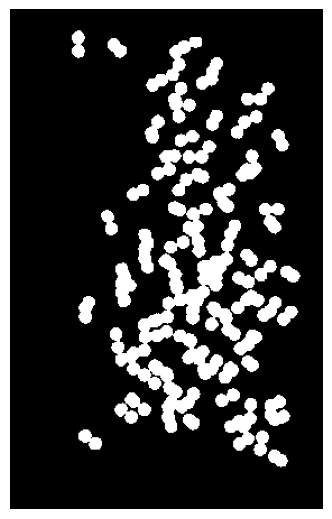

In [9]:
# Только группы перекрывающихся частиц
ret_2, thresh_2 = cv2.threshold(circles, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels_2, labels_2, stats_2, centroids_2 = cv2.connectedComponentsWithStats(thresh_2, 8)
final_circles_2 = np.zeros(circles.shape)

for i in range(labels_2.shape[0]):
    for j in range(labels_2.shape[1]):
        label = labels_2[i, j]
        if 160 < stats_2[label, 4] < 37000:
            final_circles_2[i, j] = 255

final_circles_2 = final_circles_2.astype(np.uint8)
ret, thresh = cv2.threshold(final_circles_2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8)

print(f'Количество: {num_labels - 1}')
show_gray(final_circles_2)

Количество: 53


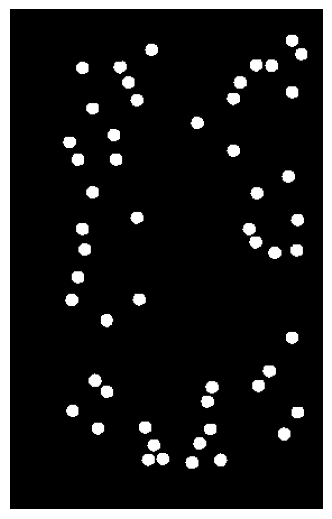

In [10]:
# Только одиночные круглые частицы
ret_3, thresh_3 = cv2.threshold(circles, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels_3, labels_3, stats_3, centroids_3 = cv2.connectedComponentsWithStats(thresh_3, 8)
final_circles_3 = np.zeros(circles.shape)

for i in range(labels_3.shape[0]):
    for j in range(labels_3.shape[1]):
        label = labels_3[i, j]
        if stats_3[label, 4] < 160:
            final_circles_3[i, j] = 255

final_circles_3 = final_circles_3.astype(np.uint8)
ret, thresh = cv2.threshold(final_circles_3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU, cv2.CV_32S)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, 8)

print(f'Количество: {num_labels - 1}')
show_gray(final_circles_3)

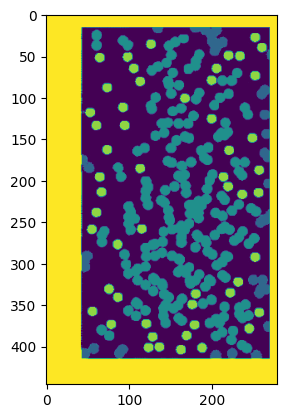

In [11]:
# Раскраска отдельных компонентов
import copy
colored_circles = copy.deepcopy(circles)

for i in range(circles.shape[0]):
    for j in range(circles.shape[1]):
        if final_circles_1[i, j] == 255:
          colored_circles[i, j] = 85
        elif final_circles_2[i, j] == 255:
          colored_circles[i, j] = 128
        elif final_circles_3[i, j] == 255:
          colored_circles[i, j] = 213

colored_circles = colored_circles.astype(np.uint8)
plt.imshow(colored_circles)

**3. (5 баллов)** **Watershed**

* Возьмите изображения: *coins_1.jpg*, *coins_noize_1.jpg*
* Примените к ним алгоритм водораздела, чтобы посчитать монетки
* отсоритруйте монетки по размеру и у каждой моентки в центре впишите порядковое число

В сниппете кода содержится подсказка о том, какие функции стоит поприменять.

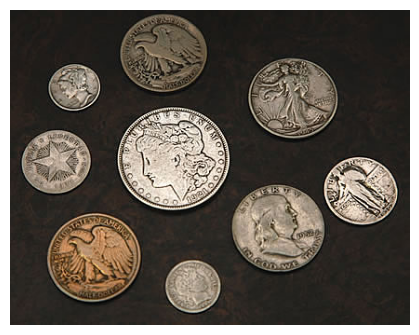

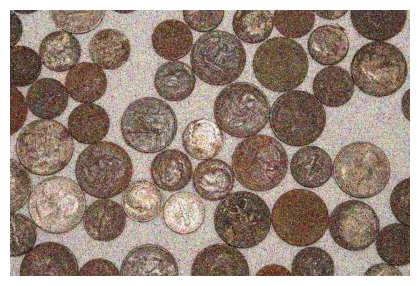

In [17]:
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import scipy
from scipy.ndimage import distance_transform_edt
from scipy.ndimage import label
from cv2 import pyrMeanShiftFiltering
coins_1 = cv2.imread(str(sources_path / "coins_1.jpg"))
show_bgr(coins_1, size=(4, 5))
coins_2 = cv2.imread(str(sources_path / "coins_noize_1.jpg"))
show_bgr(coins_2, size=(4, 5))

**Первая картинка**

Количество монет равно 9


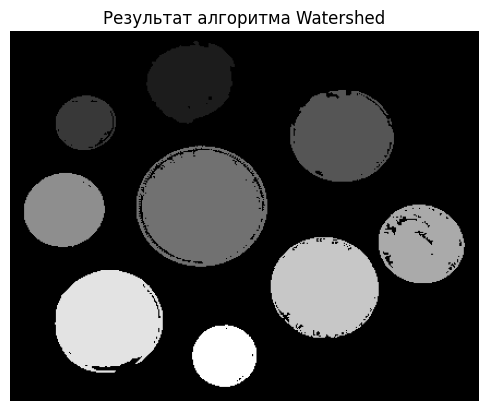

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# применим алгорим Watershed, посчитаем, сколько всего монет
image_shifted = pyrMeanShiftFiltering(coins_1, 10, 100)
gray = cv2.cvtColor(image_shifted, cv2.COLOR_BGR2GRAY)
res, thresh = cv2.threshold(src=gray, thresh=75, maxval=255, type=cv2.THRESH_BINARY)
D = distance_transform_edt(thresh)
local_max = peak_local_max(D, indices=False, min_distance=30,
	labels=thresh)
markers = label(local_max)[0]
labels = watershed(-D, markers, mask=thresh)
print("Количество монет равно {}".format(len(np.unique(labels)) - 1))

plt.figure()
plt.title("Результат алгоритма Watershed")
plt.imshow(labels, cmap="gray")
plt.axis("off");

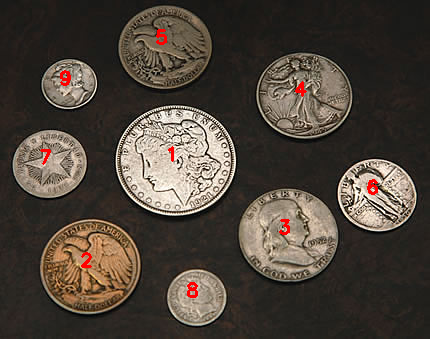

In [14]:
import imutils
from google.colab.patches import cv2_imshow

values, counts = np.unique(labels, return_counts = True)
indices_ord = counts.argsort()[::-1]
size = 0
for label in indices_ord:
	if label == 0:
		continue
	size += 1
	mask = np.zeros(gray.shape, dtype="uint8")
	mask[labels == label] = 255
	cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
		cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)
	((x, y), r) = cv2.minEnclosingCircle(c)
	cv2.putText(coins_1, "{}".format(size), (int(x) - 10, int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
cv2_imshow(coins_1)

Вторая картинка

Количество монет равно 44


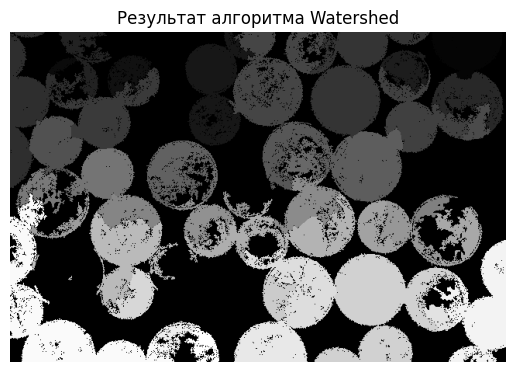

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# применим алгорим Watershed, посчитаем, сколько всего монет
image_shifted = pyrMeanShiftFiltering(coins_2, 10, 30)
gray = cv2.cvtColor(image_shifted, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
D = distance_transform_edt(thresh)
local_max = peak_local_max(D, indices=False, min_distance=30,
	labels=thresh)
markers = label(local_max)[0]
labels = watershed(-D, markers, mask=thresh)
print("Количество монет равно {}".format(len(np.unique(labels)) - 1))

plt.figure()
plt.title("Результат алгоритма Watershed")
plt.imshow(labels, cmap="gray")
plt.axis("off");

# Фильтры габора

**4. (15 баллов)**  

Реализуйте функцию, которая построит банк фильтров Габора по входящим аргументам n, m.
* n – число различных частот в дипазоне (0; max_freq]
* m - число различных напралений в диапазоне [0; Pi)

Продемонструйте, что предложенные фильтры более-менее плотно заполняют частотное просранство. Для этого переведите все фильтры в частотное пространство и отобразите все их одновременно на одной картинке.

Реализуйте интерактивное demo в котром будут два слайдера, один отвечает за разные разные частоы, другой за разные направления. Выведите 3 изображения:
* Вид фильтра в пространстве изображений
* Вид Фильтра в частотном пространстве
* Результат применения фильтра к $lena.jpg$

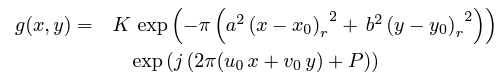

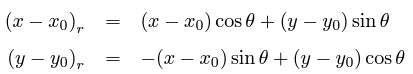

**Результат применения фильтра к  lena.jpg**

In [21]:
lena = cv2.imread("/content/drive/MyDrive/Image_analysis/Материалы/lena.jpg")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

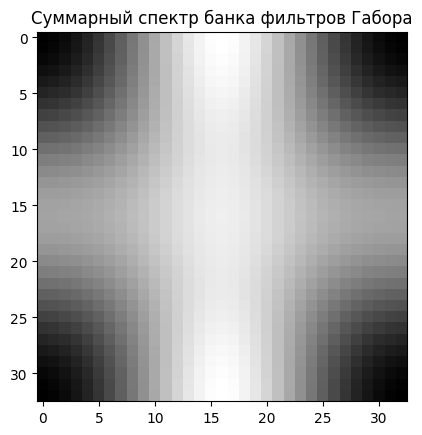

In [23]:
def create_gabor_filter(size, freq, phi, std_x, std_y):
    """
    Создает фильтр Габора с заданными параметрами.
    """
    filter = np.zeros((2 * size + 1, 2 * size + 1))
    for x in range(-size, size + 1, 1):
        for y in range(-size, size + 1, 1):
            x_phi = x * np.cos(phi) + y * np.sin(phi)
            y_phi = -x * np.sin(phi) + y * np.cos(phi)
            filter[size + x, size + y] = np.exp(-0.5 * (x_phi ** 2 / std_x ** 2 + y_phi ** 2 / std_y ** 2)) * \
                                         np.cos(2 * np.pi * freq * x_phi)
    return filter

def create_gabor_filter_bank(n, m, max_freq, size, std_x, std_y):
    """
    Создает банк фильтров Габора с различными частотами и углами ориентации.
    """
    freqs = np.linspace(1, max_freq, n)
    angles = np.linspace(0., np.pi, m)
    spectrum = np.zeros((2 * size + 1, 2 * size + 1))

    for i in range(n):
        for j in range(m):
            gf = create_gabor_filter(size, freqs[i], angles[j], std_x, std_y)
            dft = np.fft.fftshift(np.fft.fft2(gf))
            spectrum += np.abs(dft)

    plt.imshow(spectrum, cmap='gray')
    plt.title('Суммарный спектр банка фильтров Габора')
    plt.show()

create_gabor_filter_bank(10, 10, 2, 16, 1, 2 / 3)

In [24]:
import ipywidgets as widgets
from ipywidgets import *
from scipy import signal

def gabor_filter_demo(freq, phi):
    """
    Демонстрирует применение фильтра Габора с заданными параметрами к изображению.
    """
    fig = plt.figure(figsize=(15, 5))
    gf = create_gabor_filter(10, freq, phi, 1, 1)
    dft = np.fft.fftshift(np.fft.fft2(gf))
    spectrum = np.abs(dft)
    filtered_img = signal.convolve2d(lena, gf, boundary='symm', mode='same')

    ax1 = fig.add_subplot(131)
    ax1.imshow(gf, cmap='gray')
    ax1.set_title('Фильтр в пространственном домене')

    ax2 = fig.add_subplot(132)
    ax2.imshow(spectrum, cmap='gray')
    ax2.set_title('Фильтр в частотном домене')

    ax3 = fig.add_subplot(133)
    ax3.imshow(filtered_img, cmap='gray')
    ax3.set_title('Результат применения фильтра к lena.jpg')

    plt.show()


interact(gabor_filter_demo,
         freq = widgets.IntSlider(value=1, min=1, max=10, step=1),
         phi = widgets.IntSlider(value=90, min=0, max=180, step=10))

interactive(children=(IntSlider(value=1, description='freq', max=10, min=1), IntSlider(value=90, description='…

<function __main__.gabor_filter_demo(freq, phi)>

# Цветовые гистрограммы.

**5. (15 баллов)**

Надо реализовать функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор)
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

Посмотрите на изображения в папке *Corel* (https://drive.google.com/drive/folders/1VbLDcmDye9wqZhnS7gg5i7Rxh2Vm_73F?usp=share_link). Посчитайте гистограммы изображений. Выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются для лучшей комбинации. В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики, joint_vs_marginal)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

Постройте сводную таблицу-отчет в которою впишите, сколько похожих пар получилось для каждого эксперимента. Проведите не менее 8 экспериментов и напишите какие-нибудь выводы

In [25]:
# читаем изображения
import os
import itertools

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        images.append(img)
    return images

corel = load_images(str(sources_path / "Corel"))
# создаем пары (id, image)
input = [(i, corel[i]) for i in range(len(corel))]
# генерируем все возможные комбинации id 2 изображений
comb = [x for x in itertools.combinations([i for i in range(len(input))], 2)]

In [26]:
# сравним схожесть цветовых гистрограмм в цветовом пространстве HSV с помощью 3 разных метрик сравнения
# метрики: L2, Хи-квадрат, пересечение гистограмм
CHImetrics, INTERmetrics, l2metrics = [], [], []
for c in range(len(comb)):
    img1_hsv = cv2.cvtColor(input[comb[c][0]][1], cv2.COLOR_BGR2HSV)
    img2_hsv = cv2.cvtColor(input[comb[c][1]][1], cv2.COLOR_BGR2HSV)
    hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [180,256], [0,180,0,256])
    cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [180,256], [0,180,0,256])
    cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    # считаем метрику
    metric_CHI = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
    metric_INTER = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
    metric_l2 = cv2.norm(hist_img1, hist_img2, normType=cv2.NORM_L2)
    CHImetrics.append((metric_CHI,comb[c]))
    INTERmetrics.append((metric_INTER,comb[c]))
    l2metrics.append((metric_l2,comb[c]))
# чем меньше Хи-квадрат, тем лучше
CHImetrics_sorted = sorted(CHImetrics, key=lambda x: x[0])[:20]
# чем выше пересечение, тем лучше
INTERmetrics_sorted = sorted(INTERmetrics, key=lambda x: x[0], reverse=True)[:20]
# чем меньше l2, тем лучше
l2metrics_sorted = sorted(l2metrics, key=lambda x: x[0])[:20]

In [27]:
# Тоже самое, но в цветовом пространстве RGB
CHImetrics, INTERmetrics, l2metrics = [], [], []
for c in range(len(comb)):
    img1_RGB = cv2.cvtColor(input[comb[c][0]][1], cv2.COLOR_BGR2RGB)
    img2_RGB = cv2.cvtColor(input[comb[c][1]][1], cv2.COLOR_BGR2RGB)
    hist_img1 = cv2.calcHist([img1_RGB], [0,1], None, [180,256], [0,180,0,256])
    cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    hist_img2 = cv2.calcHist([img2_RGB], [0,1], None, [180,256], [0,180,0,256])
    cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    # считаем метрику
    metric_CHI = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
    metric_INTER = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
    metric_l2 = cv2.norm(hist_img1, hist_img2, normType=cv2.NORM_L2)
    CHImetrics.append((metric_CHI,comb[c]))
    INTERmetrics.append((metric_INTER,comb[c]))
    l2metrics.append((metric_l2,comb[c]))
# чем меньше Хи-квадрат, тем лучше
CHImetrics_sorted = sorted(CHImetrics, key=lambda x: x[0])[:20]
# чем выше пересечение, тем лучше
INTERmetrics_sorted = sorted(INTERmetrics, key=lambda x: x[0], reverse=True)[:20]
# чем меньше l2, тем лучше
l2metrics_sorted = sorted(l2metrics, key=lambda x: x[0])[:20]

In [28]:
# Тоже самое, но в цветовом пространстве CIELab
CHImetrics, INTERmetrics, l2metrics = [], [], []
for c in range(len(comb)):
    img1_Lab = cv2.cvtColor(input[comb[c][0]][1], cv2.COLOR_BGR2Lab)
    img2_Lab = cv2.cvtColor(input[comb[c][1]][1], cv2.COLOR_BGR2Lab)
    hist_img1 = cv2.calcHist([img1_Lab], [0,1], None, [32, 32], [0, 256, 0, 256])
    cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    hist_img2 = cv2.calcHist([img2_Lab], [0,1], None, [32, 32], [0, 256, 0, 256])
    cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    # считаем метрику
    metric_CHI = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
    metric_INTER = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
    metric_l2 = cv2.norm(hist_img1, hist_img2, normType=cv2.NORM_L2)
    CHImetrics.append((metric_CHI,comb[c]))
    INTERmetrics.append((metric_INTER,comb[c]))
    l2metrics.append((metric_l2,comb[c]))
# чем меньше Хи-квадрат, тем лучше
CHImetrics_sorted = sorted(CHImetrics, key=lambda x: x[0])[:20]
# чем выше пересечение, тем лучше
INTERmetrics_sorted = sorted(INTERmetrics, key=lambda x: x[0], reverse=True)[:20]
# чем меньше l2, тем лучше
l2metrics_sorted = sorted(l2metrics, key=lambda x: x[0])[:20]

In [29]:
# HSV c другими бинами
CHImetrics, INTERmetrics, l2metrics = [], [], []
for c in range(len(comb)):
    img1_hsv = cv2.cvtColor(input[comb[c][0]][1], cv2.COLOR_BGR2HSV)
    img2_hsv = cv2.cvtColor(input[comb[c][1]][1], cv2.COLOR_BGR2HSV)
    hist_img1 = cv2.calcHist([img1_hsv], [0,1], None, [32, 32], [0, 256, 0, 256])
    cv2.normalize(hist_img1, hist_img1, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    hist_img2 = cv2.calcHist([img2_hsv], [0,1], None, [32, 32], [0, 256, 0, 256])
    cv2.normalize(hist_img2, hist_img2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX);
    # считаем метрику
    metric_CHI = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)
    metric_INTER = cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_INTERSECT)
    metric_l2 = cv2.norm(hist_img1, hist_img2, normType=cv2.NORM_L2)
    CHImetrics.append((metric_CHI,comb[c]))
    INTERmetrics.append((metric_INTER,comb[c]))
    l2metrics.append((metric_l2,comb[c]))
# чем меньше Хи-квадрат, тем лучше
CHImetrics_sorted = sorted(CHImetrics, key=lambda x: x[0])[:20]
# чем выше пересечение, тем лучше
INTERmetrics_sorted = sorted(INTERmetrics, key=lambda x: x[0], reverse=True)[:20]
# чем меньше l2, тем лучше
l2metrics_sorted = sorted(l2metrics, key=lambda x: x[0])[:20]

In [30]:
for i in range(20):
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    im1 = input[l2metrics_sorted[i][1][0]][1]
    im2 = input[l2metrics_sorted[i][1][1]][1]
    ax[0].imshow(cv2.cvtColor(im1, cv2.COLOR_BGR2RGB))
    ax[1].imshow(cv2.cvtColor(im2, cv2.COLOR_BGR2RGB))

Output hidden; open in https://colab.research.google.com to view.

Итого из 12 экспериметов (HVS с 3 метриками с 2 вариантами бинов + RBG с 3 метриками + CIELab с 3 метриками), лучший вариант -  HVS с метрикой сравнения "пересечение гистограм" (12 похожих пар).

# Гистограмма градиентов

**6. (10 баллов)**

Реализуйте функцию вычисления $HOG$ дескриптора для изображения, которая принимает на вход размер сетки. Визуализируйте полученный дескриптор на изображении *susi_example.jpg* с сетками размером 10x8 и 5x4. Просканируйте скользящим окном изображение *susi_gallery.jpg* и подсветите все области, дексриптор которых поход на дескриптор *susi_example.jpg*. В идеальном случае мы должны получить 3 изображения, для которых надо подобрать порог похожести:
* Та самая вырезанная сушина.
* Все суши с креветкой.
* Все суши, которые визуально похожи на суши с креветкой.

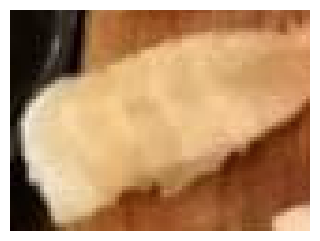

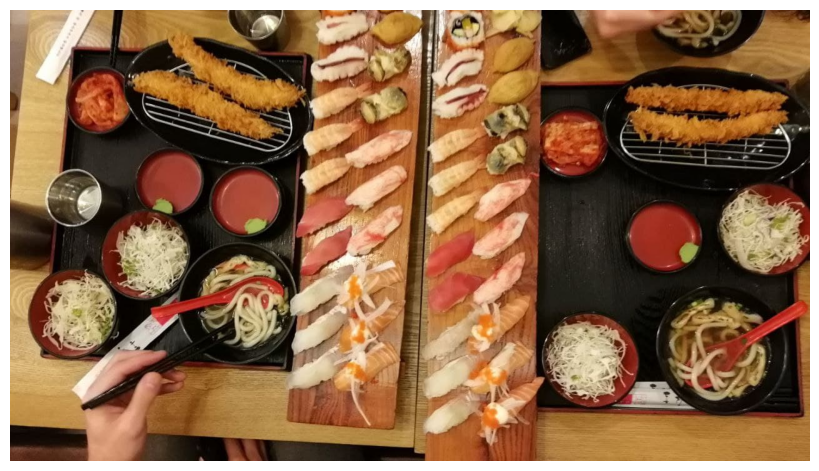

In [31]:
susi_example = cv2.imread(str(sources_path / "susi_example.jpg"))
show_bgr(susi_example, size=(3, 4))
susi_gallery = cv2.imread(str(sources_path / "susi_gallery.jpg"))
show_bgr(susi_gallery, size=(8, 16))

In [32]:
from itertools import product
import math
from tqdm.auto import tqdm

In [33]:
def get_gradient(img):
    """
    Вычисляет градиенты изображения по оси x и y.
    """
  img = np.float32(img)
  gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
  gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
  grad_mag, grad_angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
  grad_angle %= 180
  return grad_mag, grad_angle



def build_histogram(mag, angle, num_bins):
    """
    Строит гистограмму ориентированных градиентов в ячейке.
    """
  h, w = mag.shape
  hist = np.zeros(num_bins)
  stride = 180 / num_bins
  for i, j in product(np.arange(h), np.arange(w)):
        m, a = mag[i][j], angle[i][j]
        a = a % 180
        j = math.floor(a / stride)
        val_j = m * (1 - (a - stride*j) / stride)
        hist[j] += val_j
        hist[(j+1)%num_bins] += m - val_j

  hist = cv2.normalize(hist, None)
  return hist

def extract_hog(img, cell_h=10, cell_w=8, num_bins=9):
    """
    Извлекает HOG дескриптор для изображения с заданными параметрами сетки и числом бинов.
    """
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = np.float32(img) / 255
  mag, angle = get_gradient(img)

  num_cell_h = math.ceil(img.shape[0] / cell_h)
  num_cell_w = math.ceil(img.shape[1] / cell_w)
  hog = []

  for row in range(0, num_cell_h * cell_h, cell_h):
    for col in range(0, num_cell_w * cell_w, cell_w):
      hog.append(build_histogram(mag[row:row+cell_h,col:col+cell_w],
                                 angle[row:row+cell_h, col:col+cell_w],
                                       num_bins))
  return np.array(hog)

In [34]:
def visualize_hog(img, hog, cell_h=10, cell_w=8, num_bins=9):
    """
    Визуализирует HOG дескриптор на изображении.
    """
  num_cell_h = math.ceil(img.shape[0] / cell_h)
  num_cell_w = math.ceil(img.shape[1] / cell_w)
  num_cells = num_cell_h * num_cell_w

  deg = np.linspace(0, 2*np.pi, 2*num_bins, endpoint = False)
  len_vecs = 2 * num_bins * num_cells

  U, V = np.zeros(len_vecs), np.zeros(len_vecs)
  X, Y = np.zeros(len_vecs), np.zeros(len_vecs)

  cnt, hog_id = 0, 0
  for row in range(0, num_cell_h * cell_h, cell_h):
    for col in range(0, num_cell_w * cell_w, cell_w):
      cur = hog[hog_id]
      hog_id += 1
      for v in range(2*num_bins):
        Y[cnt] = (cell_h / 2) + row
        X[cnt] = (cell_w / 2) + col
        U[cnt] = cur[v % num_bins] * np.cos(deg[v])
        V[cnt] = cur[v % num_bins] * np.sin(deg[v])

        cnt += 1


  plt.quiver(X, Y, U, V, color='white', scale_units = 'inches')
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
hog = extract_hog(susi_example, 5, 4)

<ipython-input-34-dac1a57c5436>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  U[cnt] = cur[v % num_bins] * np.cos(deg[v])
<ipython-input-34-dac1a57c5436>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  V[cnt] = cur[v % num_bins] * np.sin(deg[v])


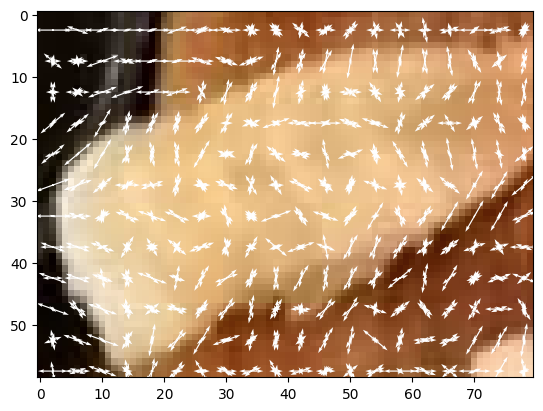

In [36]:
visualize_hog(susi_example, hog, 5, 4)

In [38]:
def compare_images(template, img, thresh, step):
    """
    Сравнивает изображение-шаблон с другим изображением и подсвечивает области, где дескрипторы похожи.
    """
  hog_template = extract_hog(template)
  h, w, _ = template.shape
  res = []
  res_rows = []

  for row in tqdm(range(0, img.shape[0]-h, step)):
    for col in range(0, img.shape[1]-w, step):
      hog_img = extract_hog(img[row:row+h, col:col+w])
      diff = np.linalg.norm(hog_img-hog_template)
      if diff < thresh:
        res.append((diff, row, col))

  res = sorted(res, key=lambda x: x[0])
  img_copy = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
  for i in range(len(res)):
    if all(abs(res[i][1] - row) > 30 for row in res_rows):
      res_rows.append(res[i][1])
      sp = (res[i][2], res[i][1])
      ep = (res[i][2] + w, res[i][1] + h)
      cv2.rectangle(img_copy, sp, ep, (0, 255, 0), thickness=2)
  plt.imshow(img_copy)
  return res

In [39]:
bunch = susi_gallery[:, 420:880]

  0%|          | 0/67 [00:00<?, ?it/s]

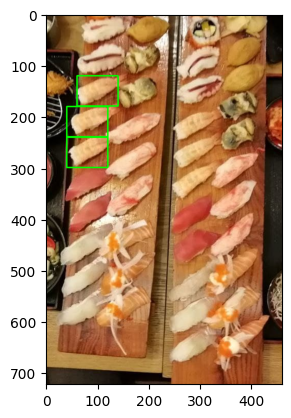

In [40]:
# Та самая вырезанная сушина
res = compare_images(susi_example, bunch, thresh=5, step=10);